<a href="https://colab.research.google.com/github/jordan-gould/CS167Fall22Code/blob/main/CS_167_Project_1_Gould.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1
# Name: Jordan Gould

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments - creation of dummy variables, filling in missing values, etc.

For my data preparation, I first loaded in the data. Then I dropped the null values from the price column, since that is the variable I was trying to predict. Next, I removed the whole CarName column, since the values in it varied greatly and it would've been very difficult to use that to accurately predict the price. Next, I replaced the text variables doornumber and cylindernumber with their numerical equivalents. After that I replaced n/a values with the mean of their columns in every column that had numerical data. Next, I replaced the n/a values from the text-based columns with the word "null". The last step to cleaning the data was creating dummy variables for all of the text based columns.

After all of that cleaning, the data was finally ready to be split and normalized.

In [2]:
# import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# load data
car_data = pandas.read_csv('/content/drive/MyDrive/CS167Datasets/CarPricesProject1.csv')

# drop any null values from the price column, since its our target variable
car_data.dropna(subset = ['price'], inplace = True)

# I decided to completely drop the CarName column since there are so many possible classification variables
car_data.drop(['CarName'], axis = 1, inplace = True)

# replace the door number and cylinder number columns with their respective numerical values
car_data['doornumber'].replace(['two','four'], [2,4], inplace = True)
car_data['cylindernumber'].replace(["two", "three", "four", "five", "six", "eight", "twelve"], [2,3,4,5,6,8,12], inplace = True)

# replace any n/a values of the numerical columns with the mean of that column
for col in ["symboling", "doornumber", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "cylindernumber", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]:
  car_data[col].fillna(car_data[col].mean(), inplace = True)

# replace any n/a values in the text columns with the word "null"
for col in ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "enginetype", "fuelsystem"]:
  car_data[col].fillna("null", inplace = True)

#create dummy variables for any of the columns that are text-based values
car_dummies = pandas.get_dummies(car_data, columns = ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "enginetype", "fuelsystem"])

#car_dummies.head()

In [3]:
# set the target and predictor columns and then split our data
target = 'price'
predictors = car_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummies[predictors], car_dummies[target], test_size = 0.2, random_state = 17)
        
# normalize the data
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

# Part 1: Regression
How well can you predict target value `price`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


The metrics I will be using to determine how well my model works are Mean Squared Error and R^2. These metrics are appropriate because the data is numerical, so we must see how close we get to the actual price. I'm not sure what the baseline for MSE would be for this model, since price is such a large number that I feel like the answer could vary greatly. I believe that R^2 may be a much better and easier metric to use. The baseline of R^2 would be 0, meaning the model is average at guessing the price. We want an R^2 value close to 1, which is perfectly guessing the price. A negative R^2 value would mean that it would actually be better for us to use the average value.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [4]:
# Non-weighted kNN 
neigh = neighbors.KNeighborsRegressor() 
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)

MSE = metrics.mean_squared_error(test_sln, predictions)
R2 = metrics.r2_score(test_sln, predictions)

print("Non-weighted kNN results:")
print('MSE: ', MSE)
print('R^2: ', R2)

Non-weighted kNN results:
MSE:  19789210.811707318
R^2:  0.7677539494548122


In [5]:
# Weighted kNN
weigh_neigh = neighbors.KNeighborsRegressor(weights = "distance") 
weigh_neigh.fit(train_data, train_sln)
weighted_predictions = weigh_neigh.predict(test_data)

W_MSE = metrics.mean_squared_error(test_sln, weighted_predictions)
W_R2 = metrics.r2_score(test_sln, weighted_predictions)

print("Weighted kNN results:")
print('MSE: ', W_MSE)
print('R^2: ', W_R2)

Weighted kNN results:
MSE:  13701497.554520918
R^2:  0.8391993130059796


In [9]:
# Descion trees
dt = tree.DecisionTreeRegressor()
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Decision tree results:")
print('MSE: ', DT_MSE)
print('R^2: ', DT_R2)

Decision tree results:
MSE:  11851163.92682927
R^2:  0.8609148165352111


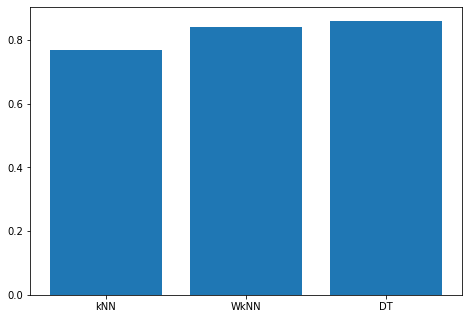

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['kNN', 'WkNN', 'DT']
values = [R2,W_R2,DT_R2]
ax.bar(langs,values)
plt.show()

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


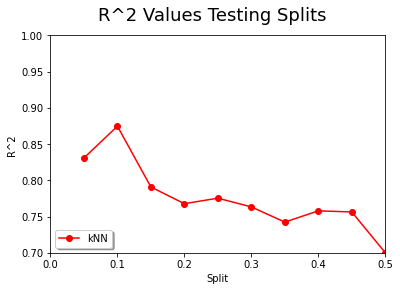

In [11]:
# for loop for testing train-test split values
k = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
r2_vals = []
for i in k:
  test_size = i
  target = "price"
  predictors = car_dummies.columns.drop(target)
  train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummies[predictors], car_dummies[target], test_size = i, random_state=17)
        
# normalize the data
  scaler = StandardScaler()
  scaler.fit(train_data)
  train_data_normalized = scaler.transform(train_data)
  test_data_normalized = scaler.transform(test_data)

  neigh = neighbors.KNeighborsRegressor() 
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)

  R2 = metrics.r2_score(test_sln, predictions)
  r2_vals.append(R2)

#plot the data
plt.suptitle('R^2 Values Testing Splits', fontsize=18)
plt.xlabel('Split')
plt.ylabel('R^2')
plt.plot(k,r2_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,.5,0.7,1])

plt.show()  

# **NOTE** 
I based how well my model predicted the target based on the R^2 value alone, mainly because the MSE was massive and had a huge variance that I believe would've been very difficult to accurately measure.



This shows that the best R^2 value for this train-test split is when the split is .1. This will be the value I will tune the rest of my parameters to.

In [12]:
# set the target and predictor columns and then split our data, this time with a test_size of .1
target = "price"
predictors = car_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
      train_test_split(car_dummies[predictors], car_dummies[target], test_size = .1, random_state=17)
        
# normalize the data
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

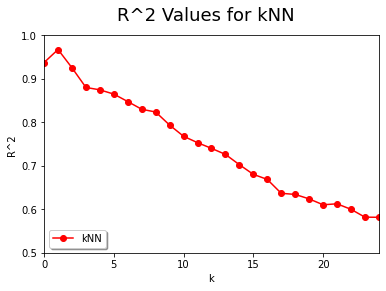

In [13]:
#this cell was used to find the best k-value for predicting the price based on the r^2 
k_vals = 25
r2_vals = []
  
for k in range(k_vals):
  neigh = neighbors.KNeighborsRegressor(n_neighbors = k+1)
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)
  R2 = metrics.r2_score(test_sln, predictions)
  r2_vals.append(R2)

#plot the data
plt.suptitle('R^2 Values for kNN', fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(range(k_vals),r2_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.5,1])

plt.show()

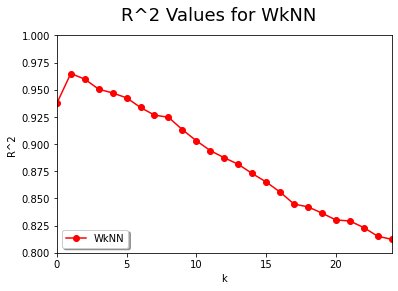

In [14]:
#this cell was used to find the best weighted k-value for predicting the price based on the r^2 
k_vals = 25
w_r2_vals = []
  
for k in range(k_vals):
  weigh_neigh = neighbors.KNeighborsRegressor(n_neighbors = k+1, weights = 'distance') 
  weigh_neigh.fit(train_data, train_sln)
  weighted_predictions = weigh_neigh.predict(test_data)
  W_R2 = metrics.r2_score(test_sln, weighted_predictions)
  w_r2_vals.append(W_R2)

#plot the data
plt.suptitle('R^2 Values for WkNN', fontsize=18)
plt.xlabel('k')
plt.ylabel('R^2')
plt.plot(range(k_vals),w_r2_vals,'ro-', label='WkNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,.8,1])

plt.show()

# **Note**

The value for k is actually 1 greater than the graph shows it to be. This will be the same for many of the other graphs moving forward.

The result of this was that the greatest k-value for kNN and WkNN was 2.

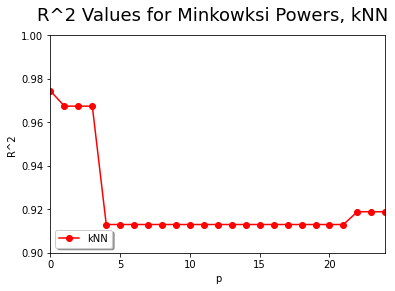

In [15]:
#this cell was used to find the best value for parameter p (minkowski metric) based on the r^2
p_vals = 25
r2_vals = []
  
for p in range(p_vals):
  neigh = neighbors.KNeighborsRegressor(n_neighbors = 2, p = p+1) 
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)
  R2 = metrics.r2_score(test_sln, predictions)
  r2_vals.append(R2)

#plot the data
plt.suptitle('R^2 Values for Minkowksi Powers, kNN', fontsize=18)
plt.xlabel('p')
plt.ylabel('R^2')
plt.plot(range(p_vals),r2_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.9,1])

plt.show()

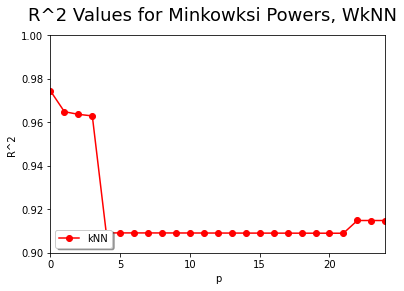

In [16]:
#this cell was used to find the best value for parameter p (minkowski metric) based on the r^2
p_vals = 25
w_r2_vals = []
  
for p in range(p_vals):
  weigh_neigh = neighbors.KNeighborsRegressor(n_neighbors = 2, weights = 'distance', p = p+1) 
  weigh_neigh.fit(train_data, train_sln)
  weighted_predictions = weigh_neigh.predict(test_data)
  W_R2 = metrics.r2_score(test_sln, weighted_predictions)
  w_r2_vals.append(W_R2)

#plot the data
plt.suptitle('R^2 Values for Minkowksi Powers, WkNN', fontsize=18)
plt.xlabel('p')
plt.ylabel('R^2')
plt.plot(range(p_vals),w_r2_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.9,1])

plt.show()

The best power parameter for the Minkowski Metric was 1. This means that Manhattan distance is the best way to measure the distance, as opposed to Euclidean distance which is the default.

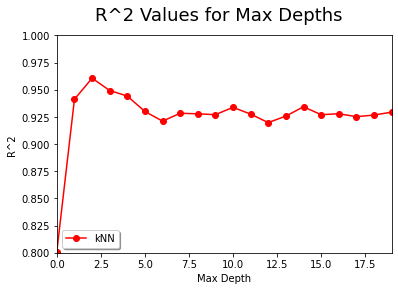

In [17]:
# this cell is used to find the best max_depth of the decision tree based on the r^2
depth_vals = 20
dt_r2_vals = []
for i in range(depth_vals):
  dt = tree.DecisionTreeRegressor(max_depth = i + 1) 
  dt.fit(train_data, train_sln)
  predictions = dt.predict(test_data)
  DT_R2 = metrics.r2_score(test_sln, predictions)
  dt_r2_vals.append(DT_R2)

#plot the data
plt.suptitle('R^2 Values for Max Depths', fontsize=18)
plt.xlabel('Max Depth')
plt.ylabel('R^2')
plt.plot(range(depth_vals),dt_r2_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,depth_vals-1,0.8,1])

plt.show()

This shows that the greatest max depth for predicting the target variable was 3, based on the R^2 values as shown in the graph.

In [18]:
# this cell is used to test what is the best criterion for our decision tree
dt = tree.DecisionTreeRegressor(max_depth = 3, criterion = 'squared_error')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Squared Error Results:")
print('MSE: ', DT_MSE)
print('R^2: ', DT_R2)

dt = tree.DecisionTreeRegressor(max_depth = 3, criterion = 'friedman_mse')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Friedman MSE Results:")
print('MSE: ', DT_MSE)
print('R^2: ', DT_R2)

dt = tree.DecisionTreeRegressor(max_depth = 3, criterion = 'absolute_error')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Absolute Error Results:")
print('MSE: ', DT_MSE)
print('R^2: ', DT_R2)

dt = tree.DecisionTreeRegressor(max_depth = 3, criterion = 'poisson')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Poisson Results:")
print('MSE: ', DT_MSE)
print('R^2: ', DT_R2)

Squared Error Results:
MSE:  3989206.8104460933
R^2:  0.9605941610675379
Friedman MSE Results:
MSE:  3989206.8104460933
R^2:  0.9605941610675379
Absolute Error Results:
MSE:  7147487.095238095
R^2:  0.9293963089330763
Poisson Results:
MSE:  72027826.5513586
R^2:  0.28850093098563656


This shows that the default criterion and friedman mse both return the best result, so I will be continuing to use squared_error as my criterion.

In [19]:
# Non-weighted kNN with adjusted parameters
neigh = neighbors.KNeighborsRegressor(n_neighbors = 2, p = 1) 
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)

adj_MSE = metrics.mean_squared_error(test_sln, predictions)
adj_R2 = metrics.r2_score(test_sln, predictions)

print("Non-weighted kNN results:")
print('MSE: ', adj_MSE)
print('R^2: ', adj_R2)

Non-weighted kNN results:
MSE:  2589479.1904761903
R^2:  0.9744208298171795


In [20]:
# Weighted kNN with adjusted parameters
weigh_neigh = neighbors.KNeighborsRegressor(weights = "distance", n_neighbors = 2, p = 1) 
weigh_neigh.fit(train_data, train_sln)
weighted_predictions = weigh_neigh.predict(test_data)

adj_W_MSE = metrics.mean_squared_error(test_sln, weighted_predictions)
adj_W_R2 = metrics.r2_score(test_sln, weighted_predictions)

print("Weighted kNN results:")
print('MSE: ', adj_W_MSE)
print('R^2: ', adj_W_R2)

Weighted kNN results:
MSE:  2585240.529443759
R^2:  0.9744626997933101


In [21]:
# Descion trees with adjusted parameters
dt = tree.DecisionTreeRegressor(max_depth=3)
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

adj_DT_MSE = metrics.mean_squared_error(test_sln, dt_predictions)
adj_DT_R2 = metrics.r2_score(test_sln, dt_predictions)

print("Decision tree results:")
print('MSE: ', adj_DT_MSE)
print('R^2: ', adj_DT_R2)

Decision tree results:
MSE:  3989206.8104460933
R^2:  0.9605941610675379


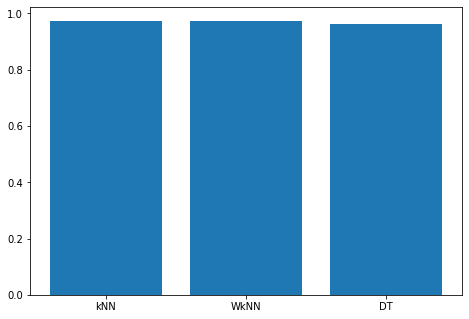

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['kNN', 'WkNN', 'DT']
values = [adj_R2,adj_W_R2,adj_DT_R2]
ax.bar(langs,values)
plt.show()

- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.



I learned that the train-test split can have a pretty large effect on the model, as well as the k-value. When it comes to decision trees, the max depth can also be pretty vital in creating a good model. These parameters seemed the most important to me because I felt that they would relate directly to much of what we've been talking about in class. I predict that my model won't work nearly as well on the 'competition testing set' due to the nature of basing it on a random state. These parameters worked the best for my random state, so I'm sure that it will perform worse when that is changed.

# Part 2: Classification
How well can you predict `carbody`?

- **Metrics**: Identify which metrics you will be using to test your model, and say why they are appropriate. Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly?


Accuracy is the metric I will be using to test my model. This is appropriate because it is a measure of whether not something is classified as the right value. It is strictly a yes or no answer, which is different from our regression metrics. The accuracy of the model is a percentage between 0-100. If we guessed randomly with this data, I would expect a lower accuracy since there are multiple possible carbody values to guess.

- **Initial Models**: Develop basic code for kNN, weighted kNN, and Decision Trees. Make some experiments here, including graphs to help you identify which algorithm and parameters may be best.


In [24]:
# I chose to clean the data once again for classification since the target variable is different here
car_data = pandas.read_csv('/content/drive/MyDrive/CS167Datasets/CarPricesProject1.csv')

# I dropped n/a values from the carbody column
car_data.dropna(subset = ["carbody"], inplace = True)

# dropped the "CarName" column as I did earlier
car_data.drop(["CarName"], axis = 1, inplace = True)

#same reason as before
car_data["doornumber"].replace(["two","four"], [2,4], inplace = True)
car_data["cylindernumber"].replace(["two", "three", "four", "five", "six", "eight", "twelve"], [2,3,4,5,6,8,12], inplace = True)

#same as befoe with price included
for col in ["symboling", "doornumber", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "cylindernumber", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]:
  car_data[col].fillna(car_data[col].mean(), inplace = True)

#same as before with carbody removed
for col in ["fueltype", "aspiration", "drivewheel", "enginelocation", "enginetype", "fuelsystem"]:
  car_data[col].fillna("null", inplace = True)

#created dummy variables for all of the categorical data
car_dummies = pandas.get_dummies(car_data, columns = ["fueltype", "aspiration", "drivewheel", "enginelocation", "enginetype", "fuelsystem"])

# Split the data based on the new target variable 
target = "carbody"
predictors = car_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummies[predictors], car_dummies[target], test_size = 0.2, random_state=17)

#normalize the data after splitting
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [29]:
# non-weighted kNN 
neigh = neighbors.KNeighborsClassifier() 
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)

AC = metrics.accuracy_score(test_sln,predictions)

print("kNN non-weighted Accuracy:")
print("Accuracy:", AC)

kNN non-weighted Accuracy:
Accuracy: 0.43902439024390244


In [30]:
# Weighted kNN
weigh_neigh = neighbors.KNeighborsClassifier(weights = "distance") 
weigh_neigh.fit(train_data, train_sln)
weighted_predictions = weigh_neigh.predict(test_data)

W_AC = metrics.accuracy_score(test_sln,weighted_predictions)

print("kNN weighted Accuracy:")
print("Accuracy:", W_AC)

kNN weighted Accuracy:
Accuracy: 0.43902439024390244


In [91]:
# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_AC = metrics.accuracy_score(test_sln,dt_predictions)

print("Decision tree results:")
print("Accuracy:", DT_AC)

Decision tree results:
Accuracy: 0.7272727272727273


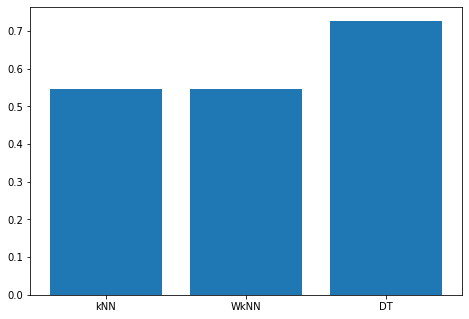

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['kNN', 'WkNN', 'DT']
values = [AC,W_AC,DT_AC]
ax.bar(langs,values)
plt.show()

At the offset, the Decision Tree was the most accurate when it came to classifying the carbody variable. I suspect this is because there is a small number of predictor variables that have a higher than normal chance to predict the target correctly, as opposed to all variables having equal weight. This is something we discussed in class and was on our first exam.

- **Fine Tuning**: Create graphs to help you identify the **optimal** values of parameters you wish to use. Utilize different train/test splits. Full credit for thorough testing and documentation.


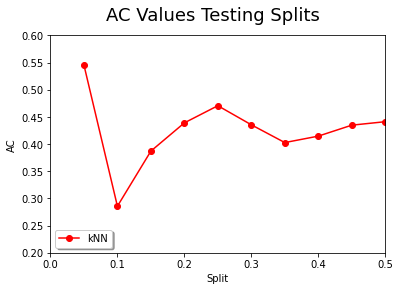

In [93]:
# for loop for testing train-test split values
k = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
ac_vals = []
for i in k:
  test_size = i
  target = "carbody"
  predictors = car_dummies.columns.drop(target)
  train_data, test_data, train_sln, test_sln = \
        train_test_split(car_dummies[predictors], car_dummies[target], test_size = i, random_state=17)
        
# normalize the data
  scaler = StandardScaler()
  scaler.fit(train_data)
  train_data_normalized = scaler.transform(train_data)
  test_data_normalized = scaler.transform(test_data)

  neigh = neighbors.KNeighborsClassifier() 
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)

  AC = metrics.accuracy_score(test_sln, predictions)
  ac_vals.append(AC)

#plot the data
plt.suptitle('AC Values Testing Splits', fontsize=18)
plt.xlabel('Split')
plt.ylabel('AC')
plt.plot(k,ac_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,.5,0.2,.6])

plt.show() 

This shows that the most accurate results come from a .05 train-test split, so I will be using that split from here on when it comes to classification.

In [94]:
# set the target and predictor columns and then split our data, this time with a test_size of .1
target = "carbody"
predictors = car_dummies.columns.drop(target)
train_data, test_data, train_sln, test_sln = \
      train_test_split(car_dummies[predictors], car_dummies[target], test_size = .05, random_state=17)
        
# normalize the data
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

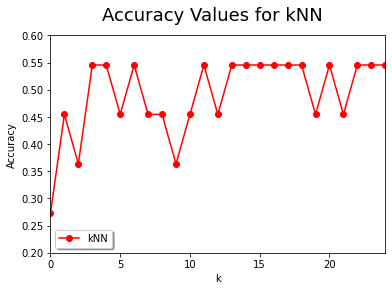

In [95]:
# this loop tests k values from 1-25 for the most accurate one
k_vals = 25
ac_vals = []
for k in range(k_vals):
 neigh = neighbors.KNeighborsClassifier(n_neighbors = k+1)
 neigh.fit(train_data, train_sln)
 predictions = neigh.predict(test_data)

 AC = metrics.accuracy_score(test_sln,predictions)
 ac_vals.append(AC)
 
#plot the data
plt.suptitle('Accuracy Values for kNN', fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(range(k_vals),ac_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.2,.6])
 
plt.show()

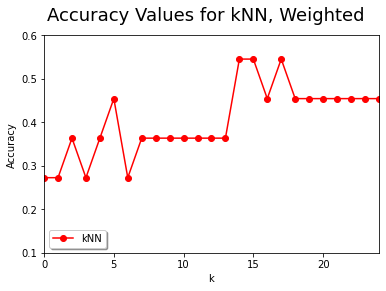

In [96]:
# this loop determines what k value is the most accurate for weighted kNN
k_vals = 25
ac_vals = []
for k in range(k_vals):
  weigh_neigh = neighbors.KNeighborsClassifier(weights = "distance", n_neighbors = k+1) 
  weigh_neigh.fit(train_data, train_sln)
  weighted_predictions = weigh_neigh.predict(test_data)

  W_AC = metrics.accuracy_score(test_sln,weighted_predictions)
  ac_vals.append(W_AC)
 
#plot the data
plt.suptitle('Accuracy Values for kNN, Weighted', fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(range(k_vals),ac_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.1,.6])
 
plt.show()

These tests show that the weighted and non-weighted kNN have 2 different k-values that provide the most accurate results. For non-weighted kNN, 4 provided the most accurate prediction, while for weighted kNN, 15 provided the most accurate prediction. These will be what I set the n_neighbors parameter to.

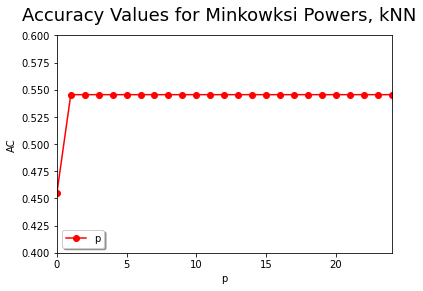

In [97]:
#this cell was used to find the best value for parameter p (minkowski metric) based on the accuracy, kNN non-weighted
p_vals = 25
ac_vals = []
  
for p in range(p_vals):
  neigh = neighbors.KNeighborsClassifier(n_neighbors = 4, p = p+1) 
  neigh.fit(train_data, train_sln)
  predictions = neigh.predict(test_data)
  AC = metrics.accuracy_score(test_sln, predictions)
  ac_vals.append(AC)

#plot the data
plt.suptitle('Accuracy Values for Minkowksi Powers, kNN', fontsize=18)
plt.xlabel('p')
plt.ylabel('AC')
plt.plot(range(p_vals),ac_vals,'ro-', label='p')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.4,.6])

plt.show()

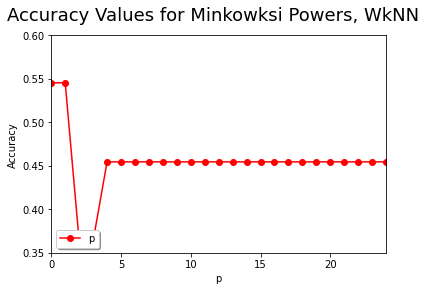

In [98]:
#this cell was used to find the best value for parameter p (minkowski metric) based on the r^2
p_vals = 25
w_ac_vals = []
  
for p in range(p_vals):
  weigh_neigh = neighbors.KNeighborsClassifier(n_neighbors = 15, weights = 'distance', p = p+1) 
  weigh_neigh.fit(train_data, train_sln)
  weighted_predictions = weigh_neigh.predict(test_data)
  W_AC = metrics.accuracy_score(test_sln, weighted_predictions)
  w_ac_vals.append(W_AC)

#plot the data
plt.suptitle('Accuracy Values for Minkowksi Powers, WkNN', fontsize=18)
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.plot(range(p_vals),w_ac_vals,'ro-', label='p')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals - 1,0.35,.6])

plt.show()

Both of these testing cells show that the best p value for the Minkowski metric is 2, meaning we use the default Euclidean distance.

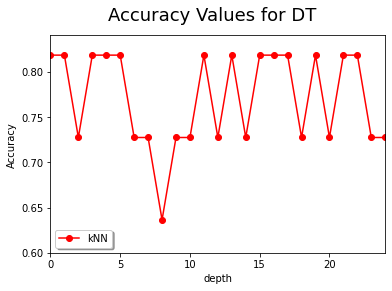

In [99]:
# this loop will see what decision tree max_depth is the most accurate
depth_vals = 25
ac_vals = []
for k in range(depth_vals):
 dt = tree.DecisionTreeClassifier(max_depth = depth_vals + 1)
 dt.fit(train_data, train_sln)
 dt_predictions = dt.predict(test_data)
 DT_AC = metrics.accuracy_score(test_sln,dt_predictions)
 ac_vals.append(DT_AC)
 
#plot the data
plt.suptitle('Accuracy Values for DT', fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.plot(range(depth_vals),ac_vals,'ro-', label='kNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,depth_vals - 1,0.6,.84])
 
plt.show()

This graph shows that many max_depth values provide the most accurate result, but for purposes of avoiding overfitting, I will choose the smallest value, which is 3. It should be noted that this graph changes when running it again, but the most accurate result I could get consistently was the one shown.

# **NOTE**

I have no clue why the accuracy values here appear to be so much higher than before, and cannot figure out as to why this happened, so I'm sure I made a mistake in my code somewhere.

In [101]:
# this cell is used to test what is the best criterion for our decision tree
dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_AC = metrics.accuracy_score(test_sln, dt_predictions)

print("Gini results:")
print('Accuracy: ', DT_AC)

dt = tree.DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_AC = metrics.accuracy_score(test_sln, dt_predictions)

print("Entropy Results:")
print('Accuracy: ', DT_AC)

Gini results:
Accuracy:  0.5454545454545454
Entropy Results:
Accuracy:  0.5454545454545454


The most accurate criterion for our decision tree was a tie between Gini and Entropy, so I will continue to use Gini as the criterion. Let it be noted that I tried to include log_loss as a criterion as well, but was given errors when trying to implement it, so I removed it.

In [102]:
# non-weighted kNN with adjusted parameters
neigh = neighbors.KNeighborsClassifier(n_neighbors = 4) 
neigh.fit(train_data, train_sln)
predictions = neigh.predict(test_data)

AC = metrics.accuracy_score(test_sln,predictions)

print("kNN non-weighted Accuracy:")
print("Accuracy:", AC)

kNN non-weighted Accuracy:
Accuracy: 0.5454545454545454


In [103]:
# Weighted kNN with adjusted parameters
weigh_neigh = neighbors.KNeighborsClassifier(weights = "distance", n_neighbors = 15) 
weigh_neigh.fit(train_data, train_sln)
weighted_predictions = weigh_neigh.predict(test_data)

W_AC = metrics.accuracy_score(test_sln,weighted_predictions)

print("kNN weighted Accuracy:")
print("Accuracy:", W_AC)

kNN weighted Accuracy:
Accuracy: 0.5454545454545454


In [109]:
# Decision Tree with adjusted parameters
dt = tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(train_data,train_sln)
dt_predictions = dt.predict(test_data)

DT_AC = metrics.accuracy_score(test_sln,dt_predictions)

print("Decision tree results:")
print("Accuracy:", DT_AC)

Decision tree results:
Accuracy: 0.5454545454545454


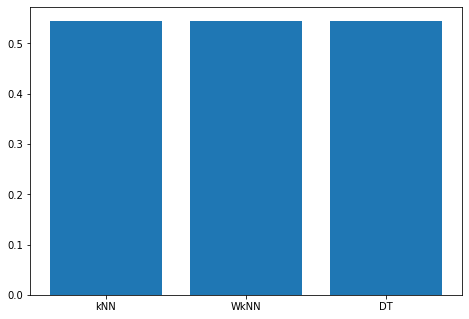

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['kNN', 'WkNN', 'DT']
values = [AC,W_AC,DT_AC]
ax.bar(langs,values)
plt.show()

- **Analysis**: What did you determine? What did you notice? How did you identify which learning algorithms you will try and which important parameters you will tune for each one? What is your predictions for the 'competition testing set'.

In this, I was able to get all of my kNN models up to a .545 accuracy after tweaking their parameters a bit. I'm really at a loss though because my decision tree model is performing worse and I have no clue why. And it's not just slightly worse but actually much worse. 

I chose to tweak the train-test split, k-values, and p-values for kNN because they had an effect when I tried them with kNeighborsRegressor, and I did similar for DecisionTreeClassifier, using different max_depths and criterion. 

I predict that this will be similarly to slightly less accurate on the competition testing set, since it is tuned to fit this random state, and not any other one



*don't forget to print out a confusion matrix*

Text(0.5, 0, 'Predicted label')

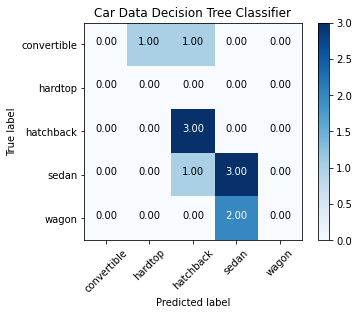

In [112]:
import itertools 

cm = metrics.confusion_matrix(test_sln, dt_predictions)
plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)
plt.title("Car Data Decision Tree Classifier")
plt.colorbar()
plt.xticks([0,1,2,3,4], dt.classes_, rotation = 45)
plt.yticks([0,1,2,3,4], dt.classes_)
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
  plt.text(j, i, format(cm[i,j], ".2f"), horizontalalignment = "center", color = "white" if cm[i, j] > thresh else "black")
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Part 3: Conclusions

**Bumps in the Road**: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


The most difficult challenges for me to overcome were knowing how exactly I needed to clean the data, and then learning how exactly to test each of the parameters to my liking. For example, I found it tough to know what columns to adjust, like replacing n/a with the mean for regression data or null for classification data. I also struggled with the proper creation of dummy variables at first. When it came to testing my parameters the way I wanted to, I had to learn how to implement loops that would correctly parse through the values I wanted to test for parameters like the split, the k-values, and the max_depth. This took a while for me to get correct and a lot of trial and error, but once it was done once it became much easier for me to do over and over again. I believe this trial and error strategy was the best way for me to adapt and complete the project the way I wanted. The only times it didn't work for me was when I was adjusting the DecisionTreeClassifier parameters, which I still don't know what I did wrong.

**Conclusions:** What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

In conclusion, picking the proper train-test split seems to have a much greater effect on the metrics you are testing than I would've ever thought. Along with that, the proper k-value is vastly important, as well as the right max-depth for your decision tree. My best models were by far the regression models, but the kNN and WkNN were specifically the greatest based on their R^2 score. The models that didn't work as well were all of the classification models, with the Decision tree causing me the most headaches to try and get correct, especially when it performed better without me adjusting parameters. I feel like regression models performed better because it was easier to predict the changing numerical values of price at a greater level than it was to predict any of the 5 types of carbody classifications.